In [1]:
!pip install spotipy

In [2]:
import matplotlib.pyplot as plt

In [3]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
cid = 'f6f537de83784ff598bbf6f8d7bc5237'
secret = 'cf96af9e5ccd42399f8a11f58c7a873b'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [4]:
artist_name = []
track_name = []
popularity = []
track_id = []
duration_ms = []
key = []
time_signature = []
acousticness = []
danceability = []
energy = []
instrumentalness = []
liveness = []
loudness = []
speechiness = []
valence = []
tempo = []
#duration_ms" : 255349,
#   "key" : 5,
#   "mode" : 0,
#   "time_signature" : 4,
#   "acousticness" : 0.514,
#   "danceability" : 0.735,
#   "energy" : 0.578,
#   "instrumentalness" : 0.0902,
#   "liveness" : 0.159,
#   "loudness" : -11.840,
#   "speechiness" : 0.0461,
#   "valence" : 0.624,
#   "tempo" : 98.002,


# #list multiple different features and append them
# for i in range(0,1000,50):
#     track_results = sp.search(q='year:2020', type='track', limit=50,offset=i)
#     for i, t in enumerate(track_results['tracks']['items']):
#         artist_name.append(t['artists'][0]['name'])
#         track_name.append(t['name'])
#         track_id.append(t['id'])
#         popularity.append(t['popularity'])

      

In [6]:
import timeit
start = timeit.default_timer()

# create empty lists where the results are going to be stored
artist_name = []
track_name = []
popularity = []
track_id = []

for i in range(0,1000,50):
    track_results = sp.search(q='year:2020', type='track', limit=50,offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        popularity.append(t['popularity'])
stop = timeit.default_timer()
print ('Time to run this code (in seconds):', stop - start)

Time to run this code (in seconds): 4.135147515


In [7]:
import pandas as pd

df_tracks = pd.DataFrame({'artist_name':artist_name,'track_name':track_name,'track_id':track_id,'popularity':popularity})
print(df_tracks.shape)
df_tracks.head()

(1000, 4)


,artist_name,track_name,track_id,popularity
0,Cardi B,WAP (feat. Megan Thee Stallion),4Oun2ylbjFKMPTiaSbbCih,98
1,24kGoldn,Mood (feat. iann dior),3tjFYV6RSFtuktYl3ZtYcq,100
2,Drake,Laugh Now Cry Later (feat. Lil Durk),2SAqBLGA283SUiwJ3xOUVI,95
3,Pop Smoke,For The Night (feat. Lil Baby & DaBaby),0PvFJmanyNQMseIFrU708S,95
4,Internet Money,Lemonade,02kDW379Yfd5PzW5A6vuGt,94


In [8]:
start = timeit.default_timer()

# empty list, batchsize and the counter for None results
rows = []
batchsize = 100
None_counter = 0

for i in range(0,len(df_tracks['track_id']),batchsize):
    batch = df_tracks['track_id'][i:i+batchsize]
    feature_results = sp.audio_features(batch)
    for i, t in enumerate(feature_results):
        if t == None:
            None_counter = None_counter + 1
        else:
            rows.append(t)
            
print('Number of tracks where no audio features were available:',None_counter)

stop = timeit.default_timer()
print ('Time to run this code (in seconds):',stop - start)

Number of tracks where no audio features were available: 0
Time to run this code (in seconds): 1.8930662439999963


In [9]:
df_audio_features = pd.DataFrame.from_dict(rows,orient='columns')
print("Shape of the dataset:", df_audio_features.shape)
df_audio_features.head()

Shape of the dataset: (1000, 18)


,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0.0194,https://api.spotify.com/v1/audio-analysis/4Oun...,0.935,187541,0.454,4Oun2ylbjFKMPTiaSbbCih,0.000000,1,0.0824,-7.509,1,0.3750,133.073,4,https://api.spotify.com/v1/tracks/4Oun2ylbjFKM...,audio_features,spotify:track:4Oun2ylbjFKMPTiaSbbCih,0.357
1,0.2210,https://api.spotify.com/v1/audio-analysis/3tjF...,0.700,140526,0.722,3tjFYV6RSFtuktYl3ZtYcq,0.000000,7,0.2720,-3.558,0,0.0369,90.989,4,https://api.spotify.com/v1/tracks/3tjFYV6RSFtu...,audio_features,spotify:track:3tjFYV6RSFtuktYl3ZtYcq,0.756
2,0.2440,https://api.spotify.com/v1/audio-analysis/2SAq...,0.761,261493,0.518,2SAqBLGA283SUiwJ3xOUVI,0.000035,0,0.1070,-8.871,1,0.1340,133.976,4,https://api.spotify.com/v1/tracks/2SAqBLGA283S...,audio_features,spotify:track:2SAqBLGA283SUiwJ3xOUVI,0.522
3,0.1140,https://api.spotify.com/v1/audio-analysis/0PvF...,0.823,190476,0.586,0PvFJmanyNQMseIFrU708S,0.000000,6,0.1930,-6.606,0,0.2000,125.971,4,https://api.spotify.com/v1/tracks/0PvFJmanyNQM...,audio_features,spotify:track:0PvFJmanyNQMseIFrU708S,0.347
4,0.2560,https://api.spotify.com/v1/audio-analysis/02kD...,0.799,195429,0.660,02kDW379Yfd5PzW5A6vuGt,0.000000,1,0.1110,-6.153,0,0.0790,140.040,4,https://api.spotify.com/v1/tracks/02kDW379Yfd5...,audio_features,spotify:track:02kDW379Yfd5PzW5A6vuGt,0.471


In [25]:
pd.merge(df_audio_features,df_tracks)

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

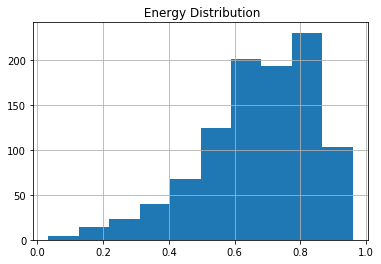

In [10]:
df_audio_features['energy'].hist()
plt.title(' Energy Distribution');

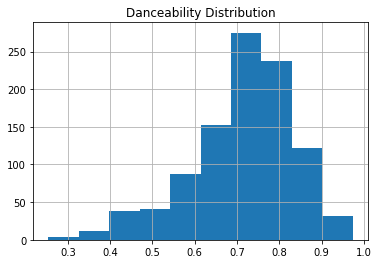

In [11]:
df_audio_features['danceability'].hist()
plt.title('Danceability Distribution');

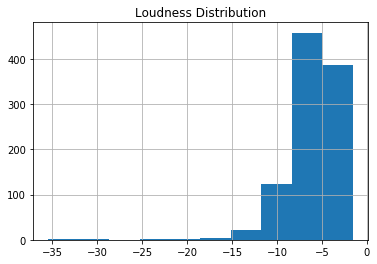

In [12]:
df_audio_features['loudness'].hist()
plt.title('Loudness Distribution');

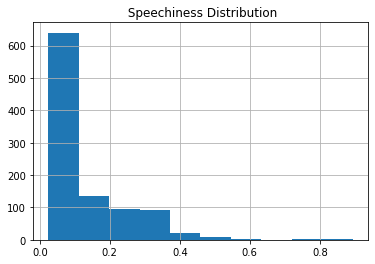

In [13]:
df_audio_features['speechiness'].hist()
plt.title(' Speechiness Distribution');

In [14]:
df_tracks.head()

,artist_name,track_name,track_id,popularity
0,Cardi B,WAP (feat. Megan Thee Stallion),4Oun2ylbjFKMPTiaSbbCih,98
1,24kGoldn,Mood (feat. iann dior),3tjFYV6RSFtuktYl3ZtYcq,100
2,Drake,Laugh Now Cry Later (feat. Lil Durk),2SAqBLGA283SUiwJ3xOUVI,95
3,Pop Smoke,For The Night (feat. Lil Baby & DaBaby),0PvFJmanyNQMseIFrU708S,95
4,Internet Money,Lemonade,02kDW379Yfd5PzW5A6vuGt,94


In [15]:
import pandas as pd
track_dataframe = pd.DataFrame({'artist_name' : artist_name, 'track_name' : track_name, 'track_id' : track_id, 'popularity' : popularity})
print(track_dataframe.shape)
track_dataframe.head()

(1000, 4)


,artist_name,track_name,track_id,popularity
0,Cardi B,WAP (feat. Megan Thee Stallion),4Oun2ylbjFKMPTiaSbbCih,98
1,24kGoldn,Mood (feat. iann dior),3tjFYV6RSFtuktYl3ZtYcq,100
2,Drake,Laugh Now Cry Later (feat. Lil Durk),2SAqBLGA283SUiwJ3xOUVI,95
3,Pop Smoke,For The Night (feat. Lil Baby & DaBaby),0PvFJmanyNQMseIFrU708S,95
4,Internet Money,Lemonade,02kDW379Yfd5PzW5A6vuGt,94


In [16]:
#  {
#  "duration_ms" : 255349,
#   "key" : 5,
#   "mode" : 0,
#   "time_signature" : 4,
#   "acousticness" : 0.514,
#   "danceability" : 0.735,
#   "energy" : 0.578,
#   "instrumentalness" : 0.0902,
#   "liveness" : 0.159,
#   "loudness" : -11.840,
#   "speechiness" : 0.0461,
#   "valence" : 0.624,
#   "tempo" : 98.002,
#   "id" : "06AKEBrKUckW0KREUWRnvT",
#   "uri" : "spotify:track:06AKEBrKUckW0KREUWRnvT",
#   "track_href" : "https://api.spotify.com/v1/tracks/06AKEBrKUckW0KREUWRnvT",
#   "analysis_url" : "https://api.spotify.com/v1/audio-analysis/06AKEBrKUckW0KREUWRnvT",
#   "type" : "audio_features"
# }

In [17]:
df = track_dataframe

In [18]:
df.head()

,artist_name,track_name,track_id,popularity
0,Cardi B,WAP (feat. Megan Thee Stallion),4Oun2ylbjFKMPTiaSbbCih,98
1,24kGoldn,Mood (feat. iann dior),3tjFYV6RSFtuktYl3ZtYcq,100
2,Drake,Laugh Now Cry Later (feat. Lil Durk),2SAqBLGA283SUiwJ3xOUVI,95
3,Pop Smoke,For The Night (feat. Lil Baby & DaBaby),0PvFJmanyNQMseIFrU708S,95
4,Internet Money,Lemonade,02kDW379Yfd5PzW5A6vuGt,94


In [19]:
df['artist_name'].value_counts()

J Balvin                      169
Daddy Yankee                  148
21 Savage                      44
Justin Bieber                  35
Maroon 5                       30
Lady Gaga                      24
Juice WRLD                     22
Taylor Swift                   20
Joji                           19
Machine Gun Kelly              13
Pop Smoke                      11
Lil Baby                       10
Anuel AA                       10
Shawn Mendes                    9
BLACKPINK                       9
Bad Bunny                       9
Selena Gomez                    9
Polo G                          9
Jason Derulo                    8
The Kid LAROI                   8
Sam Smith                       8
Trippie Redd                    8
Lil Uzi Vert                    7
iann dior                       7
DaBaby                          7
Internet Money                  6
Marshmello                      6
Future                          6
YoungBoy Never Broke Again      5
Megan Thee Sta

In [20]:
pop_rank = df.groupby('artist_name').agg({'popularity':'mean'}).reset_index()

In [21]:
pop_rank.sort_values(by = 'popularity',ascending=False)

,artist_name,popularity
3,24kGoldn,100.000000
41,Cardi B,98.000000
100,Joel Corry,94.000000
210,Tate McRae,94.000000
95,Jay Wheeler,93.000000
111,KAROL G,92.000000
183,Rauw Alejandro,91.000000
177,Powfu,91.000000
72,Farruko,91.000000
55,DJ Khaled,90.500000


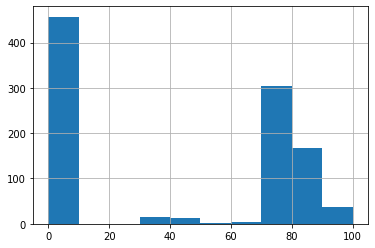

In [22]:
df['popularity'].hist()